In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the training data
data = pd.read_csv('measures.csv', delimiter=';', encoding='utf-8')

# Preprocess the training data
for col in data.select_dtypes(include=['object']).columns:
    if col != 'activity':
        data[col] = data[col].str.replace(',', '.').astype(float)

print(data.shape)
# Split data into training and testing sets based on the subjects
train_subjects = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0]
test_subjects = [27.0, 28.0, 29.0, 30.0, 31.0]

train_data = data[data['subject'].isin(train_subjects)]
test_data = data[data['subject'].isin(test_subjects)]

print(train_data.shape, test_data.shape)

# Extract features and labels
X_train = train_data.drop(columns=['subject', 'activity'])
y_train = train_data['activity']

X_test = test_data.drop(columns=['subject', 'activity'])
y_test = test_data['activity']

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = RandomForestClassifier(n_estimators=1000, random_state=32)
# model = AdaBoostClassifier(base_estimator=base_model, n_estimators=50, random_state=32)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

## Testing

# Add the predictions to the test data
test_data['predicted_activity'] = y_pred
print(f"Number of predicted columns: {test_data.shape[0]}")

# Calculate the number of correct predictions

correct_predictions = (test_data['activity'] == test_data['predicted_activity']).sum()
print(f"Number of correct predictions: {correct_predictions}")

(7352, 563)
(5867, 563) (1485, 563)
Accuracy: 95.22%
Number of predicted columns: 1485
Number of correct predictions: 1414


C:\Users\flori\AppData\Local\Temp\ipykernel_26080\3733196405.py:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data['predicted_activity'] = y_pred
C:\Users\flori\AppData\Local\Temp\ipykernel_26080\3733196405.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_activity'] = y_pred


(2947, 562)


C:\Users\flori\AppData\Local\Temp\ipykernel_26080\315273569.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data['activity'] = y_new_pred


activity
WALKING               544
LAYING                537
STANDING              534
SITTING               489
WALKING_UPSTAIRS      474
WALKING_DOWNSTAIRS    369
Name: count, dtype: int64


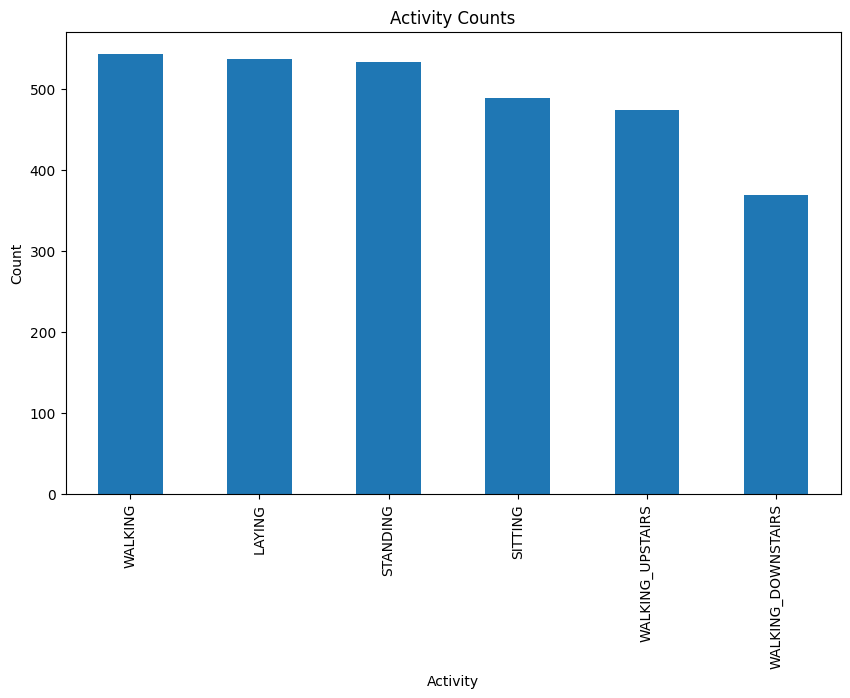

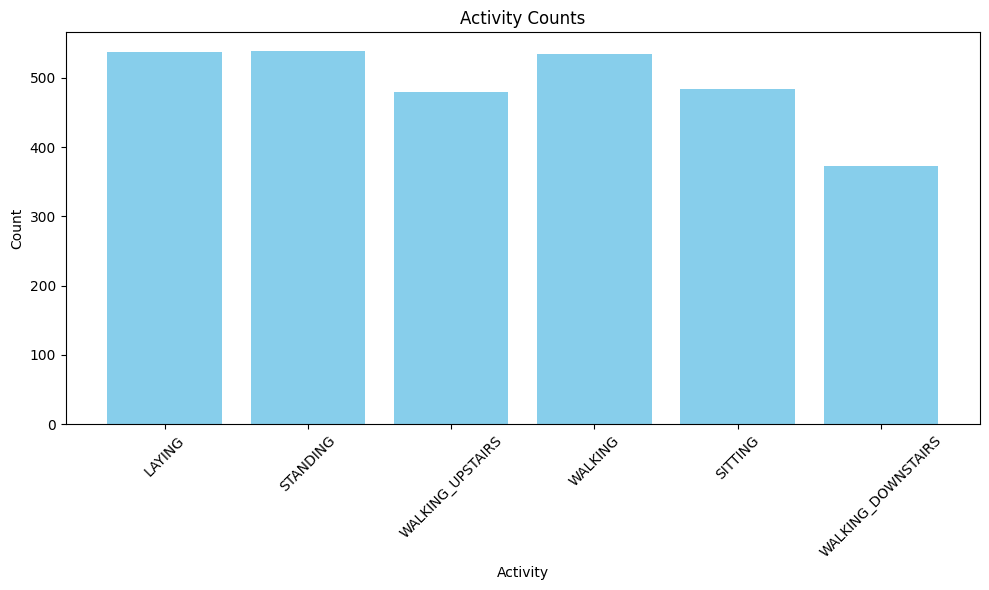

In [2]:
# Load the new data
new_data = pd.read_csv('to_predict.csv', delimiter=';', encoding='utf-8')
print(new_data.shape)
# Preprocess the new data
for col in new_data.select_dtypes(include=['object']).columns:
    if col != 'activity':
        new_data[col] = new_data[col].str.replace(',', '.').astype(float)

# Extract features
X_new = new_data.drop(columns=['subject'])

# Standardize the features
X_new = scaler.transform(X_new)

# Make predictions
y_new_pred = model.predict(X_new)

# Add the predictions to the new data
new_data['activity'] = y_new_pred

# Save the new data with the predicted activity
new_data.to_csv('predicted.csv', index=False)

predticted = pd.read_csv('predicted.csv')

activity_counts = predticted['activity'].value_counts()
print(activity_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
activity_counts.plot(kind='bar')
plt.title('Activity Counts')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()

# Compare to Erik
# Activity counts dictionary
activity_counts = {
    'WALKING': 534,
    'LAYING': 537,
    'STANDING': 539,
    'SITTING': 484,
    'WALKING_UPSTAIRS': 480,
    'WALKING_DOWNSTAIRS': 373
}

# Extract activity names and counts
activities = list(activity_counts.keys())
counts = list(activity_counts.values())

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(activities, counts, color='skyblue')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Activity Counts')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()